In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [13]:
data = pd.read_csv("D:/FPTMaterial/ky 7/DBM/lab4/numerical_dataset.csv")
X = data[['Feature1', 'Feature2']]
data2 = pd.read_csv("D:/FPTMaterial/ky 7/DBM/lab4/spatial_dataset.csv")
X2 = data2[['X', 'Y']]

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


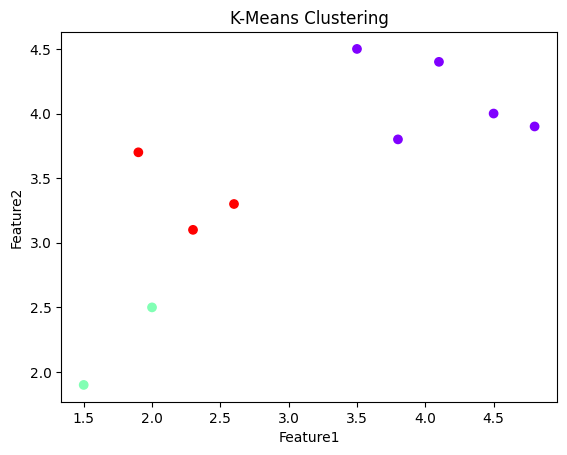

Cluster Centers:
Cluster 1: Feature1=4.14, Feature2=4.12
Cluster 2: Feature1=1.75, Feature2=2.2
Cluster 3: Feature1=2.2666666666666666, Feature2=3.3666666666666667


In [10]:
# Choose the number of clusters (you can adjust this based on the dataset)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get cluster labels and add them to the DataFrame
data['Cluster'] = kmeans.labels_

# Visualize the clustered data
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], cmap='rainbow')
plt.title("K-Means Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Print cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: Feature1={center[0]}, Feature2={center[1]}")

Cluster 1: Cluster A
Cluster 2: Cluster B
Cluster 3: Cluster C


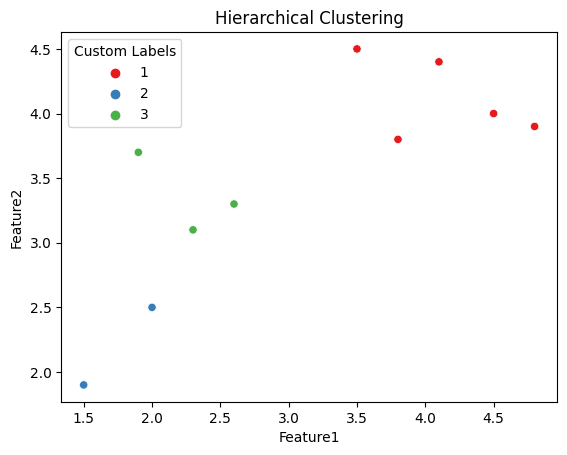

In [11]:
# Apply hierarchical clustering with a chosen linkage method
Z = linkage(X, method='ward')

# Cut the dendrogram to create clusters and add labels
num_clusters = 3  # Adjust the number of clusters as needed
data['Hierarchical_Cluster'] = fcluster(Z, t=num_clusters, criterion='maxclust')

# Visualize the hierarchical clustering results with customized labels
sns.scatterplot(x="Feature1", y="Feature2", hue="Hierarchical_Cluster", data=data, palette='Set1')

# Create custom labels for the clusters
custom_labels = {1: 'Cluster A', 2: 'Cluster B', 3: 'Cluster C'}
data['Cluster_Label'] = data['Hierarchical_Cluster'].map(custom_labels)

plt.title("Hierarchical Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

# Print the custom cluster labels
for label, cluster in custom_labels.items():
    print(f"Cluster {label}: {cluster}")

# Show the scatter plot with custom cluster labels
plt.legend(title="Custom Labels")
plt.show()

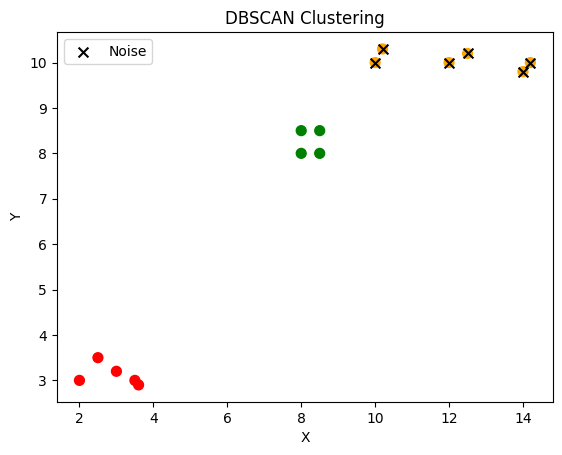

Cluster Assignments:
       X     Y  DBSCAN_Cluster
0    2.0   3.0               0
1    2.5   3.5               0
2    3.0   3.2               0
3    3.5   3.0               0
4    3.6   2.9               0
5    8.0   8.0               1
6    8.5   8.0               1
7    8.0   8.5               1
8    8.5   8.5               1
9   10.0  10.0              -1
10  10.2  10.3              -1
11  12.0  10.0              -1
12  12.5  10.2              -1
13  14.0   9.8              -1
14  14.2  10.0              -1


In [14]:
# Apply DBSCAN with chosen epsilon and minimum points
epsilon = 1.0  # Adjust the epsilon as needed
min_samples = 3  # Adjust the minimum points as needed
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data2['DBSCAN_Cluster'] = dbscan.fit_predict(X2)

# Visualize the DBSCAN clustering results
colors = np.array(['red', 'green', 'blue', 'purple', 'orange'])
plt.scatter(data2['X'], data2['Y'], c=colors[data2['DBSCAN_Cluster']], s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")

# Plot noise points as black crosses
noise_points = data2[data2['DBSCAN_Cluster'] == -1]
plt.scatter(noise_points['X'], noise_points['Y'], marker='x', color='black', s=50, label='Noise')

plt.legend()
plt.show()

# Print cluster assignments
print("Cluster Assignments:")
print(data2[['X', 'Y', 'DBSCAN_Cluster']])

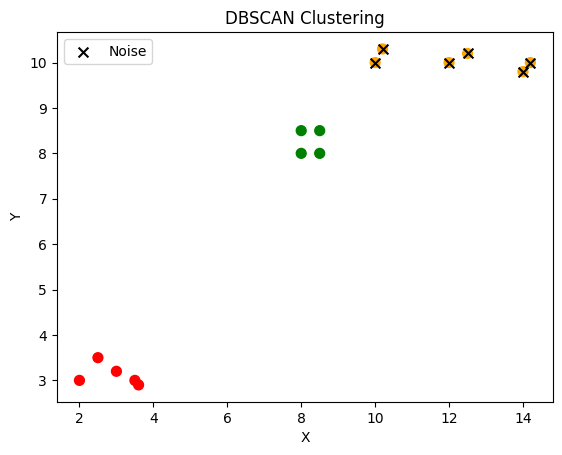

Cluster Assignments:
       X     Y  DBSCAN_Cluster
0    2.0   3.0               0
1    2.5   3.5               0
2    3.0   3.2               0
3    3.5   3.0               0
4    3.6   2.9               0
5    8.0   8.0               1
6    8.5   8.0               1
7    8.0   8.5               1
8    8.5   8.5               1
9   10.0  10.0              -1
10  10.2  10.3              -1
11  12.0  10.0              -1
12  12.5  10.2              -1
13  14.0   9.8              -1
14  14.2  10.0              -1
Silhouette Score: 0.69
Davies-Bouldin Index: 0.33


In [16]:
# Apply DBSCAN with chosen epsilon and minimum points
epsilon = 1.0  # Adjust the epsilon as needed
min_samples = 3  # Adjust the minimum points as needed
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
data2['DBSCAN_Cluster'] = dbscan.fit_predict(X2)

# Visualize the DBSCAN clustering results
colors = np.array(['red', 'green', 'blue', 'purple', 'orange'])
plt.scatter(data2['X'], data2['Y'], c=colors[data2['DBSCAN_Cluster']], s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")

# Plot noise points as black crosses
noise_points = data2[data2['DBSCAN_Cluster'] == -1]
plt.scatter(noise_points['X'], noise_points['Y'], marker='x', color='black', s=50, label='Noise')

plt.legend()
plt.show()

# Print cluster assignments
print("Cluster Assignments:")
print(data2[['X', 'Y', 'DBSCAN_Cluster']])

dbscan_results = data2['DBSCAN_Cluster']
# Calculate Silhouette Score (higher is better)
silhouette_avg = silhouette_score(data2[['X', 'Y']], dbscan_results)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate Davies-Bouldin Index (lower is better)
davies_bouldin = davies_bouldin_score(data2[['X', 'Y']], dbscan_results)
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
